In [101]:
%matplotlib widget

import math
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

## Fuel Grain Mass and Area

In [91]:
def fuel_mass(r, h):
    return (math.pi * r**2 * h) * CH4_f
# pi*r^2*h*CH4 density

In [92]:
def fuel_effective_grain_area(r):
    return 2 * math.pi * r * h
# A = pi*r^2

## Hybrid Rocket Thrust

In [169]:
def hybrid_rocket_thrust(r, h):
    
    # Fuel Mass
    m_f = fuel_mass(r, h)
    
    # OF temps
    OFtxt = pd.read_csv("/Users/jasminebeck/Hybrid Rocket/temps.txt")
    OFdata = np.genfromtxt(OFtxt, dtype=float,encoding=None, delimiter=",")
    temps = OFdata
    
    Mtxt = pd.read_csv("/Users/jasminebeck/M.txt")
    MData = np.genfromtxt(Mtxt, dtype=float, encoding=None, delimiter=",")
    M = MData
    
    Gtxt = pd.read_csv("/Users/jasminebeck/G.txt")
    Gdata = np.genfromtxt(Gtxt, dtype=float, encoding=None, delimiter=",")
    GAMMA = Gdata
    
    # Molecular Weights
    MW_fuel = 16.04      # g/mol, molecular weight of fuel (CH4)
    MW_oxidizer = 32     # g/mol, molecular weight of oxidizer (O2)
    
    # Oxidizer Flow Rate
    m_o=0.01429
    
    # Mass flux oxidizer (total)
    j_m = (m_o)/(math.pi*r**2) 
    
    # Regression rate 
    rdot = 0.304*j_m**0.527
    
    # Oxidizer mass flow rate
    mdot_o = A_t * rdot * MW_oxidizer

    # Area of the fuel grain
    A_f = fuel_effective_grain_area(r)
    
    # Fuel Mass Flow Rate
    mdot_f = m_f*A_f*rdot
    
    # Mass Flow Rate
    mdot_total = mdot_o + mdot_f 

    # Calculate the exhaust velocity
    OF_ratio = m_o/m_f
    
    for t in temps:
        for m in M:
            for g in GAMMA:
                v_e = np.sqrt((t*8.3144598)/m)*np.sqrt((2*g/g-1))#*(1-6.8947)**((g-1)/g))
                # How do I get pe and pc? - Nowhere in NASA CEA code + need 'Mach' ?

    # Calculate the rocket thrust
            thrust = (m_o + m_f) * v_e

    # Return the calculated thrust
    return thrust

## Thrust with different fuel grain sizes

In [180]:
def plotThrust(r, h, thrust):
    
    plt.figure()
    
    radii = [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1]  # fuel grain radii  m
    heights = [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]  # fuel grain heights  m
    
    volArr = np.array([])
    thrustArr = np.array([])
    
    for r in radii:
        for h in heights:
            thrust = hybrid_rocket_thrust(r, h)
            volume = np.pi*r**2*h
            
            thrustArr = np.append(thrustArr, [thrust]) 
            volArr = np.append(volArr, [volume]) 
    
    # Plotting the points
    
    plt.plot(thrustArr, volArr, marker='.', linestyle='-', color='tab:pink', label='1')
    
    plt.xlabel('Thrust (N)')
    plt.ylabel('Volume of Fuel Grain (m^3)')
  
    plt.title('Hybrid Rocket Thrust')
    
    
    plt.show()

Radius =  0.01 Height =  0.2 Thrust =  1.29 N (2dp)
Radius =  0.01 Height =  0.3 Thrust =  1.71 N (2dp)
Radius =  0.01 Height =  0.4 Thrust =  2.13 N (2dp)
Radius =  0.01 Height =  0.5 Thrust =  2.54 N (2dp)
Radius =  0.01 Height =  0.6 Thrust =  2.96 N (2dp)
Radius =  0.01 Height =  0.7 Thrust =  3.38 N (2dp)
Radius =  0.01 Height =  0.8 Thrust =  3.8 N (2dp)
Radius =  0.01 Height =  0.9 Thrust =  4.22 N (2dp)
Radius =  0.01 Height =  1.0 Thrust =  4.64 N (2dp)
Radius =  0.02 Height =  0.2 Thrust =  3.8 N (2dp)
Radius =  0.02 Height =  0.3 Thrust =  5.48 N (2dp)
Radius =  0.02 Height =  0.4 Thrust =  7.15 N (2dp)
Radius =  0.02 Height =  0.5 Thrust =  8.83 N (2dp)
Radius =  0.02 Height =  0.6 Thrust =  10.5 N (2dp)
Radius =  0.02 Height =  0.7 Thrust =  12.18 N (2dp)
Radius =  0.02 Height =  0.8 Thrust =  13.86 N (2dp)
Radius =  0.02 Height =  0.9 Thrust =  15.53 N (2dp)
Radius =  0.02 Height =  1.0 Thrust =  17.21 N (2dp)
Radius =  0.03 Height =  0.2 Thrust =  7.99 N (2dp)
Radius =  

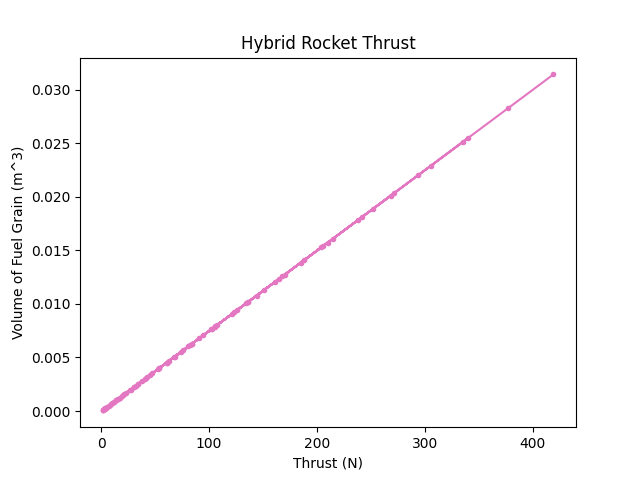

In [181]:
# Constants
A_t = 0.01  # throat area in m^2

# different fuel grain sizes
radii = [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1]  # fuel grain radii  m
heights = [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]  # fuel grain heights  m

for r in radii:
    for h in heights:
        thrust = hybrid_rocket_thrust(r, h)
        thrust2dp = str(round(thrust, 2))
        print("Radius = ", r, "Height = ", h, "Thrust = ", thrust2dp, "N (2dp)")
plotThrust(radii, heights, thrust)